In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
zomato_real=pd.read_csv("drive/My Drive/zomato.csv")
zomato_real.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
zomato_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1)

In [7]:
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

In [8]:
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [9]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [11]:
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float) # Changing the cost to Float
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [12]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [14]:
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)
zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

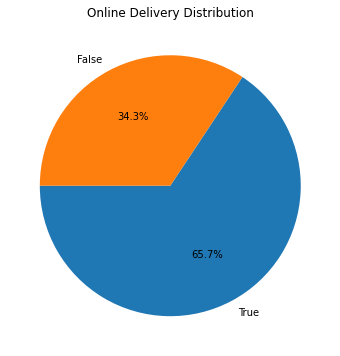

In [15]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(zomato['online_order'].value_counts()/9551*100, labels=zomato['online_order'].value_counts().index, autopct='%1.1f%%', startangle=180);

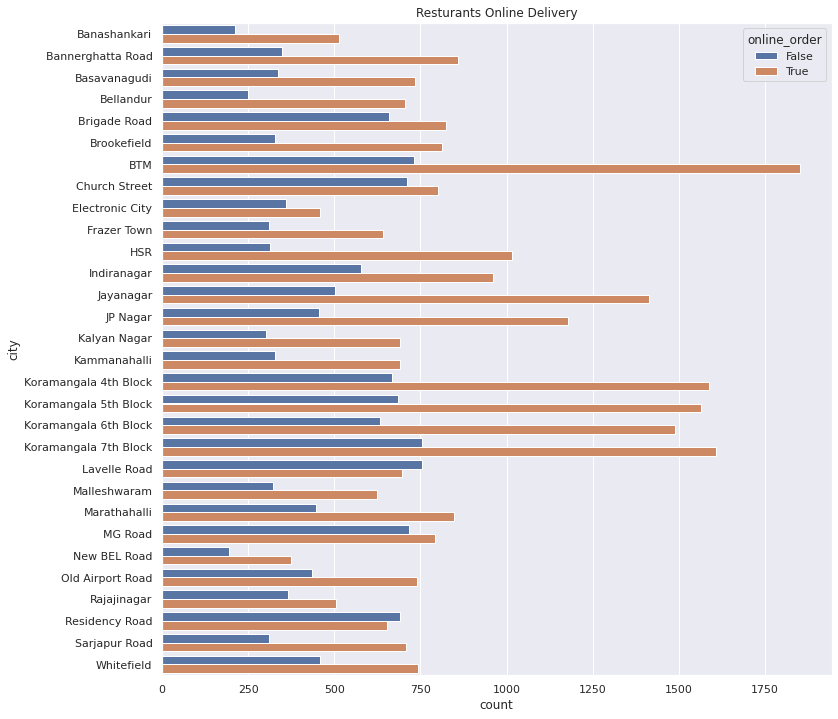

In [16]:
top_locality = zomato.city.value_counts().head(10)
sb.set_theme(style="darkgrid")
plt.figure(figsize=(12,12))
ax = sb.countplot(y= "city", hue="online_order", data=zomato)
plt.title('Resturants Online Delivery');

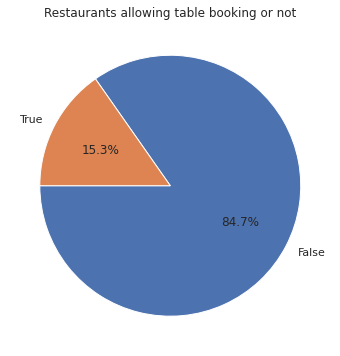

In [17]:
plt.figure(figsize=(12,6))
plt.title('Restaurants allowing table booking or not')
plt.pie(zomato['book_table'].value_counts()/9551*100, labels=zomato['book_table'].value_counts().index, autopct='%1.1f%%', startangle=180);

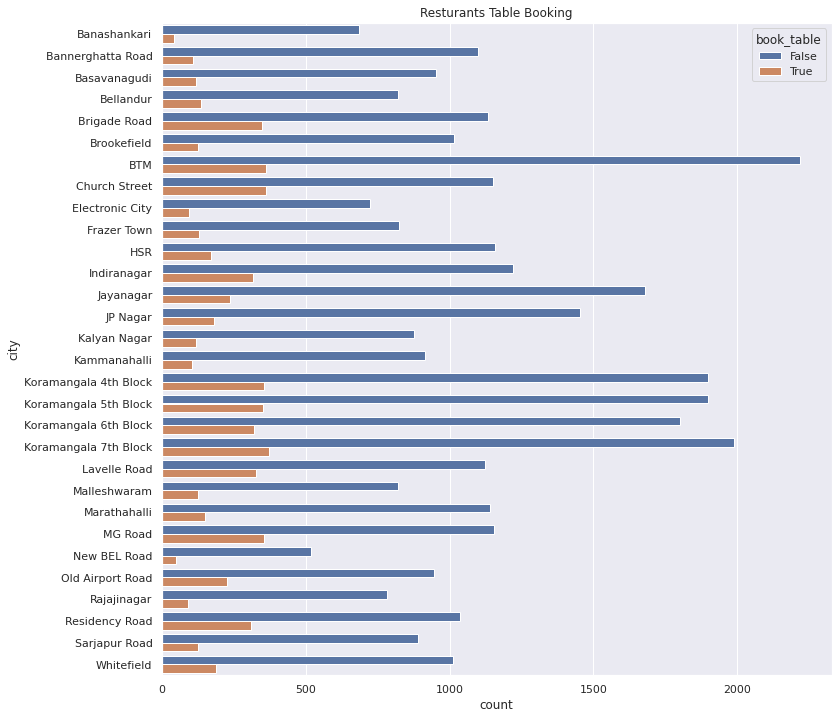

In [18]:
top_locality = zomato.city.value_counts().head(10)
sb.set_theme(style="darkgrid")
plt.figure(figsize=(12,12))
ax = sb.countplot(y= "city", hue="book_table", data=zomato)
plt.title('Resturants Table Booking');

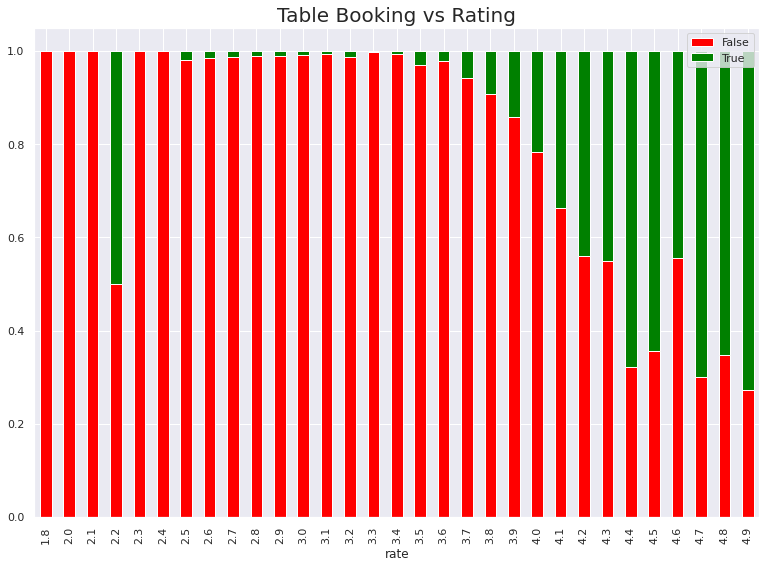

In [44]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zomato['rate'], zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','green'])
plt.title('Table Booking vs Rating', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.savefig("Table_Booking_Rate.png")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Location')

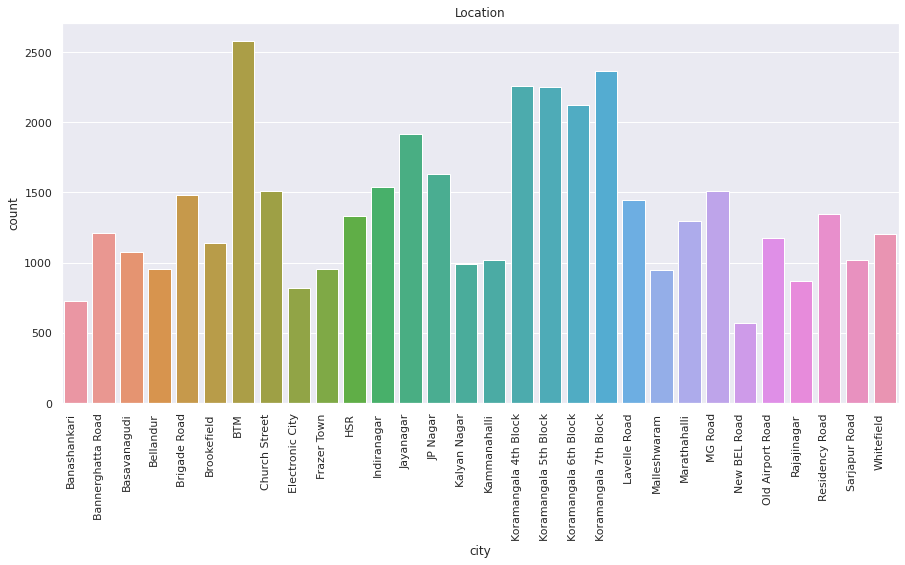

In [20]:
sb.countplot(zomato['city'])
sb.countplot(zomato['city']).set_xticklabels(sb.countplot(zomato['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.savefig("Location.png")
plt.title('Location')

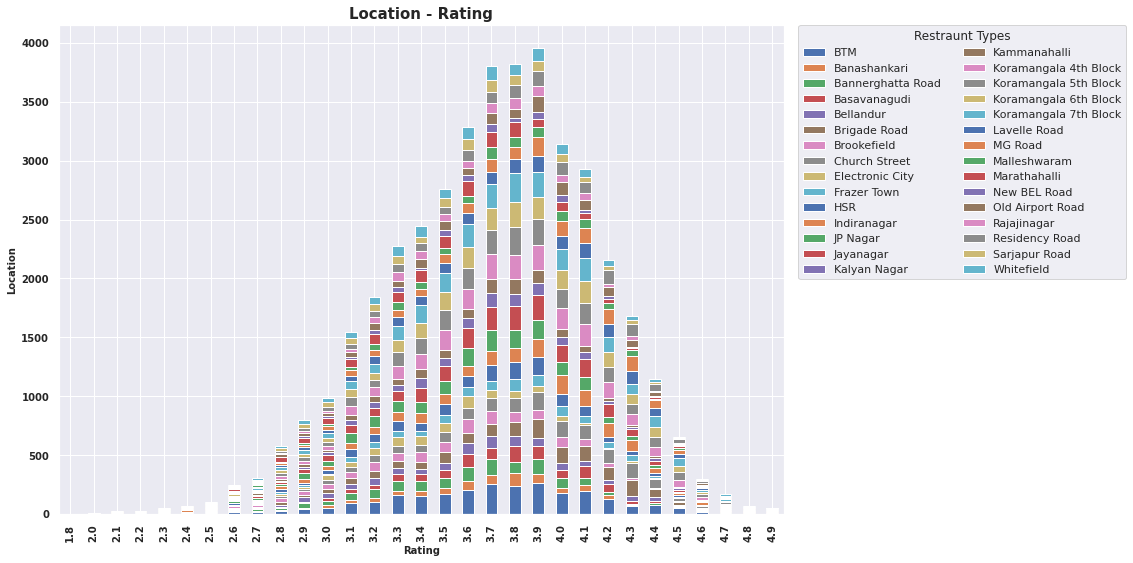

In [33]:
loc_plt=pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Restraunt Types', ncol=2)
plt.savefig("Location Rating.png")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


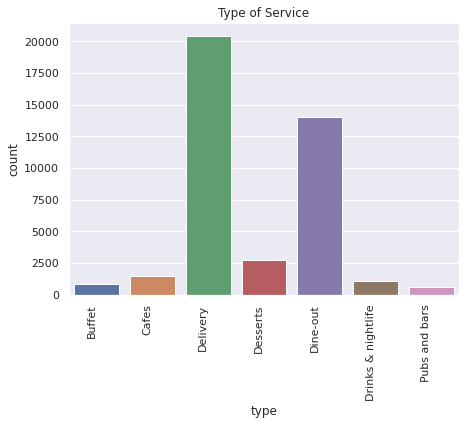

In [36]:
sb.countplot(zomato['type'])
sb.countplot(zomato['type']).set_xticklabels(sb.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(7,5)
plt.title('Type of Service')
plt.savefig('Types of Service')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


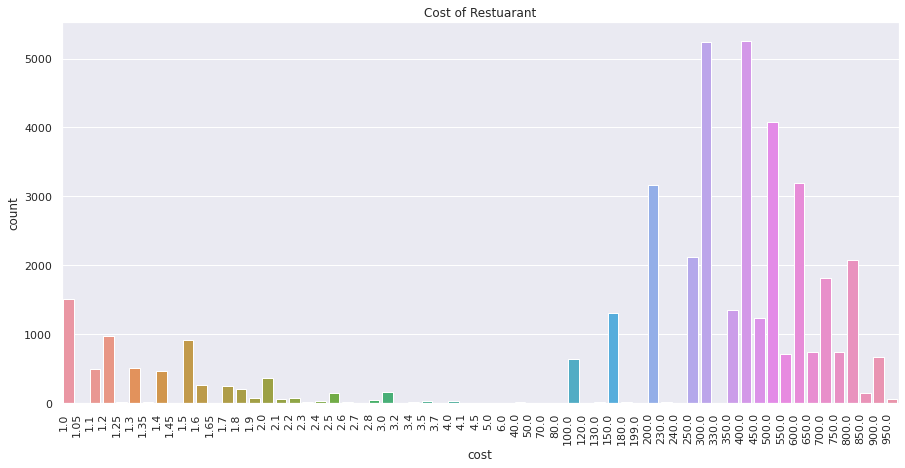

In [40]:
sb.countplot(zomato['cost'])
sb.countplot(zomato['cost']).set_xticklabels(sb.countplot(zomato['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,7)
plt.title('Cost of Restuarant')
plt.savefig('Cost of Restaurant')

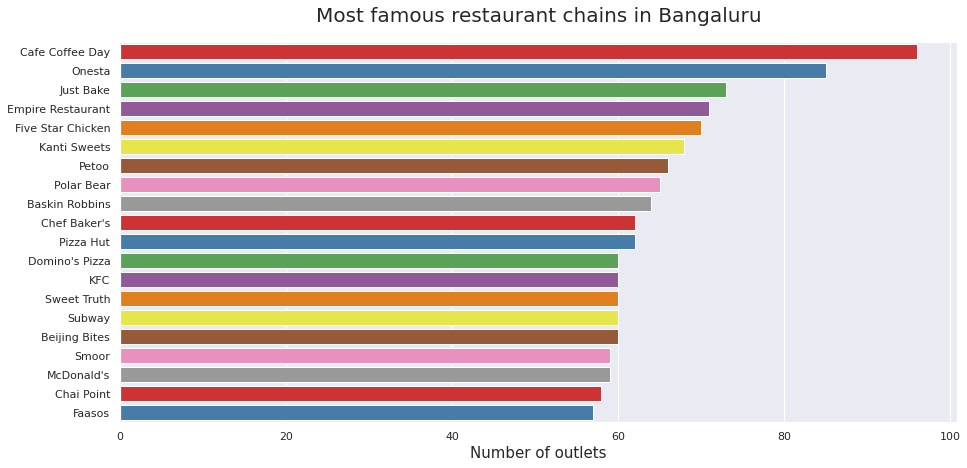

In [42]:
plt.figure(figsize=(15,7))
chains=zomato_real['name'].value_counts()[:20]
sb.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)
plt.savefig('Most famous restaurant chains')